In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_bfeature = pd.read_excel('03_train_bfeature.xlsx',index_col=0)
test_bfeature = pd.read_excel('03_test_bfeature.xlsx', index_col=0)

In [3]:
train_bfeature.head()

,ER,PR,HER,B,M,A1,A2,A3,B1,C1,...,J5,J6,BI-RADS 1,BI-RADS 2,BI-RADS 3,BI-RADS 4A,BI-RADS 4B,BI-RADS 4C,BI-RADS 5,BI-RADS 6
ID,,,,,,,,,,,,,,,,,,,,,
4664727,NaN,NaN,NaN,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4670551,NaN,NaN,NaN,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4603364,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4621837,NaN,NaN,NaN,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4633063,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [4]:
test_bfeature.head()

,ER,PR,HER,B,M,A1,A2,A3,B1,C1,...,J5,J6,BI-RADS 1,BI-RADS 2,BI-RADS 3,BI-RADS 4A,BI-RADS 4B,BI-RADS 4C,BI-RADS 5,BI-RADS 6
ID,,,,,,,,,,,,,,,,,,,,,
4531808,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4538756,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4539385,NaN,NaN,NaN,1,0,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
4544634,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4547274,NaN,NaN,NaN,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0


In [5]:
train_bfeature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2149 entries, 4664727 to 4578882
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ER          326 non-null    float64
 1   PR          322 non-null    float64
 2   HER         315 non-null    float64
 3   B           2149 non-null   int64  
 4   M           2149 non-null   int64  
 5   A1          2149 non-null   int64  
 6   A2          2149 non-null   int64  
 7   A3          2149 non-null   int64  
 8   B1          2149 non-null   int64  
 9   C1          2149 non-null   int64  
 10  D1          2149 non-null   int64  
 11  D2          2149 non-null   int64  
 12  D3          2149 non-null   int64  
 13  D4          2149 non-null   int64  
 14  E1          2149 non-null   int64  
 15  E2          2149 non-null   int64  
 16  E3          2149 non-null   int64  
 17  E4          2149 non-null   int64  
 18  E5          2149 non-null   int64  
 19  E6          2149 non-nu

In [6]:
test_bfeature.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 4531808 to 4722524
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ER          69 non-null     float64
 1   PR          69 non-null     float64
 2   HER         68 non-null     float64
 3   B           537 non-null    int64  
 4   M           537 non-null    int64  
 5   A1          537 non-null    int64  
 6   A2          537 non-null    int64  
 7   A3          537 non-null    int64  
 8   B1          537 non-null    int64  
 9   C1          537 non-null    int64  
 10  D1          537 non-null    int64  
 11  D2          537 non-null    int64  
 12  D3          537 non-null    int64  
 13  D4          537 non-null    int64  
 14  E1          537 non-null    int64  
 15  E2          537 non-null    int64  
 16  E3          537 non-null    int64  
 17  E4          537 non-null    int64  
 18  E5          537 non-null    int64  
 19  E6          537 non-null

In [7]:
train_bfeature_ = train_bfeature.iloc[:,5:39]
train_bfeature_.head()

,A1,A2,A3,B1,C1,D1,D2,D3,D4,E1,...,H3,I1,I2,I3,J1,J2,J3,J4,J5,J6
ID,,,,,,,,,,,,,,,,,,,,,
4664727,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4670551,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4603364,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4621837,0,0,1,0,0,1,1,1,1,0,...,0,0,0,1,1,0,0,0,0,0
4633063,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [8]:
test_bfeature_ = test_bfeature.iloc[:,5:39]
test_bfeature_.head()

,A1,A2,A3,B1,C1,D1,D2,D3,D4,E1,...,H3,I1,I2,I3,J1,J2,J3,J4,J5,J6
ID,,,,,,,,,,,,,,,,,,,,,
4531808,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4538756,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4539385,0,0,1,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4544634,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4547274,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [9]:
train_target = train_bfeature.B
train_target.head()

ID
4664727    1
4670551    1
4603364    1
4621837    0
4633063    1
Name: B, dtype: int64

In [10]:
test_target = test_bfeature.B
test_target.head()

ID
4531808    1
4538756    1
4539385    1
4544634    1
4547274    1
Name: B, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score

In [16]:
bi_rads = ['BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4A', 'BI-RADS 4B', 'BI-RADS 4C' ,'BI-RADS 5']
re = pd.DataFrame()
train_score = []
test_score = []

for bi in bi_rads:
    
    train_bfeature_bi = train_bfeature_[train_bfeature[bi]==1]
    train_target_bi = train_target[train_bfeature[bi]==1]
    test_bfeature_bi = test_bfeature_[test_bfeature[bi]==1]
    test_target_bi = test_target[test_bfeature[bi]==1]

    
    
    
    log_bi = LogisticRegression(solver='newton-cg',random_state=99, penalty=None)
    log_bi.fit(train_bfeature_bi, train_target_bi)
    train_bi_score = log_bi.score(train_bfeature_bi, train_target_bi)
    test_bi_score = log_bi.score(test_bfeature_bi, test_target_bi)
    
    train_score.append(train_bi_score)
    test_score.append(test_bi_score)
    
    
    
    train_bi_total = train_bfeature[bi].sum()
    train_true_sum = train_target[train_bfeature[bi]==1].sum()
    train_true_proba = train_true_sum / train_bi_total

    train_pre_sum = log_bi.predict(train_bfeature_bi).sum()
    train_pre_proba = train_pre_sum / train_bi_total
    
   
    test_bi_total = test_bfeature[bi].sum()
    test_true_sum = test_target[test_bfeature[bi]==1].sum()
    test_true_proba = test_true_sum / test_bi_total
        
    test_pre_sum = log_bi.predict(test_bfeature_bi).sum()
    test_pre_proba = test_pre_sum / test_bi_total
    
    
    re_ = pd.DataFrame((train_true_proba, train_pre_proba, test_true_proba, test_pre_proba))
    re = pd.concat((re, re_.T))

In [17]:
train_score

[1.0,
 0.9650238473767886,
 0.863013698630137,
 0.6835106382978723,
 0.6538461538461539,
 0.864406779661017]

In [18]:
test_score

[1.0,
 0.9513888888888888,
 0.8666666666666667,
 0.6494845360824743,
 0.5507246376811594,
 0.8125]

In [19]:
train_counts = [train_bfeature[bi].sum() for bi in bi_rads]
test_counts  = [test_bfeature[bi].sum() for bi in bi_rads]


In [20]:
def proportion_ci(p, n, z=1.96):
    se = np.sqrt(p * (1 - p) / n)
    lower = max(0, p - z * se)
    upper = min(1, p + z * se)
    return round(lower, 3), round(upper, 3)

train_ci = [proportion_ci(p, n) for p, n in zip(train_score, train_counts)]
test_ci  = [proportion_ci(p, n) for p, n in zip(test_score, test_counts)]

In [21]:
df_result = pd.DataFrame({
    "BI-RADS": bi_rads,
    "Train Accuracy": train_score,
    "Train CI Lower": [ci[0] for ci in train_ci],
    "Train CI Upper": [ci[1] for ci in train_ci],
    "Test Accuracy": test_score,
    "Test CI Lower": [ci[0] for ci in test_ci],
    "Test CI Upper": [ci[1] for ci in test_ci]
})

In [23]:
df_result

,BI-RADS,Train Accuracy,Train CI Lower,Train CI Upper,Test Accuracy,Test CI Lower,Test CI Upper
0,BI-RADS 2,1.000000,1.000,1.000,1.000000,1.000,1.000
1,BI-RADS 3,0.965024,0.951,0.979,0.951389,0.916,0.987
2,BI-RADS 4A,0.863014,0.838,0.888,0.866667,0.817,0.916
3,BI-RADS 4B,0.683511,0.636,0.731,0.649485,0.555,0.744
4,BI-RADS 4C,0.653846,0.593,0.715,0.550725,0.433,0.668
5,BI-RADS 5,0.864407,0.803,0.926,0.812500,0.677,0.948


# Calibration curve

In [18]:
re.index=['BI-RADS 2', 'BI-RADS 3', 'BI-RADS 4A', 'BI-RADS 4B', 'BI-RADS 4C' ,'BI-RADS 5']

In [19]:
re.columns=['train_true_proba', 'train_pre_proba', 'test_true_proba', 'test_pre_proba']

In [20]:
re

,train_true_proba,train_pre_proba,test_true_proba,test_pre_proba
BI-RADS 2,0.967213,0.967213,1.000000,1.000000
BI-RADS 3,0.965024,1.000000,0.951389,1.000000
BI-RADS 4A,0.864384,0.984932,0.877778,0.988889
BI-RADS 4B,0.664894,0.885638,0.690722,0.876289
BI-RADS 4C,0.380342,0.136752,0.507246,0.115942
BI-RADS 5,0.144068,0.025424,0.125000,0.093750


In [21]:
re_ = 1-re
re_

,train_true_proba,train_pre_proba,test_true_proba,test_pre_proba
BI-RADS 2,0.032787,0.032787,0.000000,0.000000
BI-RADS 3,0.034976,0.000000,0.048611,0.000000
BI-RADS 4A,0.135616,0.015068,0.122222,0.011111
BI-RADS 4B,0.335106,0.114362,0.309278,0.123711
BI-RADS 4C,0.619658,0.863248,0.492754,0.884058
BI-RADS 5,0.855932,0.974576,0.875000,0.906250


In [22]:
train_proba = re_.iloc[:,:2].stack().reset_index()
train_proba.columns=['BI-RADS','DATA','PROBA']
train_proba

,BI-RADS,DATA,PROBA
0,BI-RADS 2,train_true_proba,0.032787
1,BI-RADS 2,train_pre_proba,0.032787
2,BI-RADS 3,train_true_proba,0.034976
3,BI-RADS 3,train_pre_proba,0.000000
4,BI-RADS 4A,train_true_proba,0.135616
5,BI-RADS 4A,train_pre_proba,0.015068
6,BI-RADS 4B,train_true_proba,0.335106
7,BI-RADS 4B,train_pre_proba,0.114362
8,BI-RADS 4C,train_true_proba,0.619658
9,BI-RADS 4C,train_pre_proba,0.863248


In [23]:
sns.set_theme(style="white", context='paper')

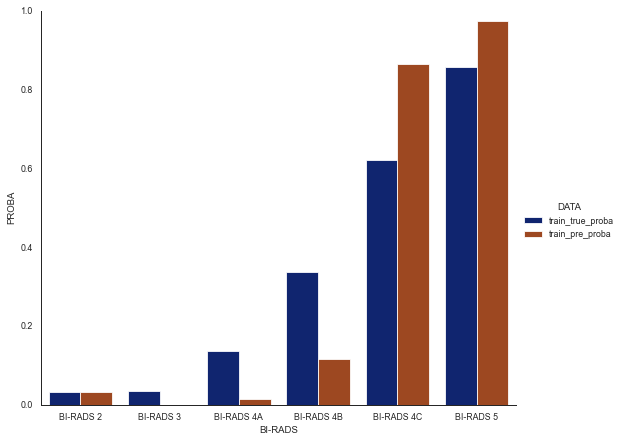

In [24]:
fig = sns.catplot(data=train_proba, kind="bar", x="BI-RADS", y="PROBA", hue="DATA",ci="sd", palette="dark", height=6, aspect=1.2)
fig.set(ylim=(0,1))
plt.savefig('04_b_train_cal_bi.jpg')

In [25]:
test_proba = re_.iloc[:,2:].stack().reset_index()
test_proba.columns=['BI-RADS','DATA','PROBA']
test_proba

,BI-RADS,DATA,PROBA
0,BI-RADS 2,test_true_proba,0.000000
1,BI-RADS 2,test_pre_proba,0.000000
2,BI-RADS 3,test_true_proba,0.048611
3,BI-RADS 3,test_pre_proba,0.000000
4,BI-RADS 4A,test_true_proba,0.122222
5,BI-RADS 4A,test_pre_proba,0.011111
6,BI-RADS 4B,test_true_proba,0.309278
7,BI-RADS 4B,test_pre_proba,0.123711
8,BI-RADS 4C,test_true_proba,0.492754
9,BI-RADS 4C,test_pre_proba,0.884058


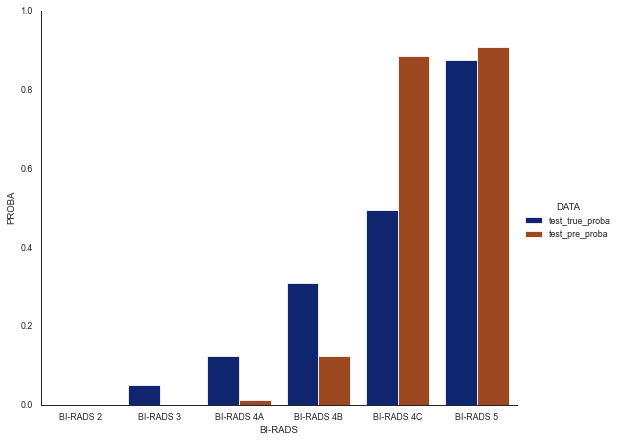

In [26]:
fig = sns.catplot(data=test_proba, kind="bar", x="BI-RADS", y="PROBA", hue="DATA",ci="sd", palette="dark", height=6, aspect=1.2)
fig.set(ylim=(0,1))
plt.savefig('04_b_test_cal_bi.jpg')